In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from scipy.signal import convolve2d
from PIL import Image
from PIL.ExifTags import TAGS
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #performs curve fitting on a set of data points

In [14]:
def produce_HDR(data, exposure, thresh):
  h = data[0].astype(np.uint) #one with longest exposure
  for i in range(1,len(data)): #other 10

    curr_img = data[i].astype(np.uint)
    #multiply the image by exposure difference between 1st and current
    curr_img = (curr_img.astype(np.float64)*(1/exposure[i])).astype(np.uint) ### exposure difference 
    #converted to the float to to deal with the HDR data without overflow

    #replace if greater than threshhold
    threshold = thresh * np.max(h) #maximum value of a pixel in h multiply to scalaer value
    h[h > threshold] = curr_img[h > threshold] #replacing the pixels above threshhold
  return h

In [15]:

def exposure_times_array():
    exposure_times = []
    for i in range(23,35):
        data = "additional-exercise/A45A69" + str(i) + ".jpg"
        image = Image.open(data)
        exif_data = image._getexif()

        if not exif_data:
            return None
    
        for tag, value in exif_data.items():
            decoded = TAGS.get(tag, tag)
            if decoded == 'ExposureTime':
                exposure_times.append(float(value))
    return(np.array(exposure_times))
exposure_times_array()

array([1.30e+01, 6.00e+00, 3.20e+00, 1.60e+00, 8.00e-01, 4.00e-01,
       2.00e-01, 1.00e-01, 5.00e-02, 2.50e-02, 1.25e-02, 6.25e-03])

In [16]:
#normalising any array to any range
def normalize_to_range(array, min_value=1, max_value=10):
  min_val = np.min(array)
  max_val = np.max(array)
  normalized_array = (array - min_val) / (max_val - min_val) * (max_value - min_value) + min_value
  return normalized_array

In [17]:
#remove
array = exposure_times_array()
normalize_to_range(array)

array([10.        ,  5.15151515,  3.21212121,  2.1038961 ,  1.54978355,
        1.27272727,  1.13419913,  1.06493506,  1.03030303,  1.01298701,
        1.004329  ,  1.        ])

In [18]:
def polynomial_func(x, a, b, c):  # Define polynomial function (2nd degree here)
    return a * x**2 + b * x + c

def luminousity_curve(plot):
    
    R_values = []
    B_values = []
    G_values = []
    exposure = exposure_times_array()
    exposure = normalize_to_range(exposure, min_value=1, max_value=10)
    print("<<<<<<<  Normalised Exposure Values  >>>>>>")
    print(exposure)
    #all four arrays above has 12 values

    for i in range(23,35):
        data = "additional-exercise/A45A69" + str(i) + ".jpg"
        array = cv2.imread(data)
        average_intensities = np.mean(array, axis=(0,1))  # Average across rows and columns (all pixels)
        red_avg, green_avg, blue_avg = average_intensities
        R_values.append(red_avg)
        G_values.append(green_avg)
        B_values.append(blue_avg)
    
    

    # Fit polynomial curves using curve_fit
    red_fit_coeffs, *_ = curve_fit(polynomial_func, exposure, R_values, bounds=(0,np.inf))
    green_fit_coeffs, *_ = curve_fit(polynomial_func, exposure, G_values, bounds=(0,np.inf))
    blue_fit_coeffs, *_ = curve_fit(polynomial_func, exposure, B_values, bounds=(0,np.inf))
    #print(len(R_values), len(G_values), len(B_values))
    
    #polynomial_func = second degree function can fit the data
    #exposure: independent variable
    #R_value: dependent variable
    #red_fit_coeffs: tuple containing the estimated coefficients of the fitted polynomial for the Red channel
    #red_fit_cov: covariance matrix, can be used to determine the uncertainity in fitting
    
    coeffs = [red_fit_coeffs, green_fit_coeffs, blue_fit_coeffs]
    
    #print(len(red_fit_coeffs), len(green_fit_coeffs), len(blue_fit_coeffs))

    plt.figure(figsize=(14, 8))
    plt.plot(exposure, R_values, 'r-', label='Red (fit)')
    plt.plot(exposure, G_values, 'g-', label='Green (fit)')
    plt.plot(exposure, B_values, 'b-', label='Blue (fit)')
    plt.xlabel('Exposure')
    plt.ylabel('Avg Pixel Value')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    if plot==True:
        plt.show()
    else:
        print("Draw Plot is False")
        plt.close()
    #print("All the coeffs are printing here...")
    return coeffs

<<<<<<<  Normalised Exposure Values  >>>>>>
[10.          5.15151515  3.21212121  2.1038961   1.54978355  1.27272727
  1.13419913  1.06493506  1.03030303  1.01298701  1.004329    1.        ]


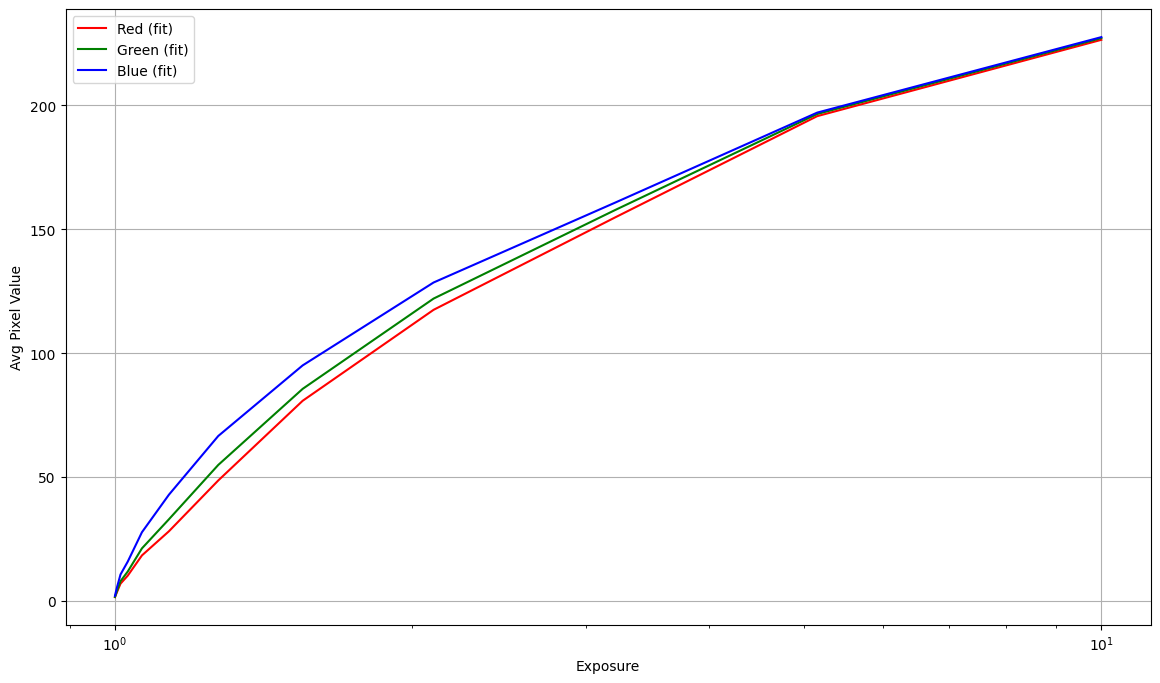

[array([5.45034732e-17, 2.63144302e+01, 9.59282921e+00]),
 array([3.31189614e-18, 2.60786623e+01, 1.27561050e+01]),
 array([1.32025781e-22, 2.54132552e+01, 1.91115862e+01])]

In [19]:
luminousity_curve(True)
#LUMINOSITY CURVE: relationship between the intensity of light (luminance) hitting the sensor and the recorded pixel value in an image

<<<<<<<  Normalised Exposure Values  >>>>>>
[10.          5.15151515  3.21212121  2.1038961   1.54978355  1.27272727
  1.13419913  1.06493506  1.03030303  1.01298701  1.004329    1.        ]
Draw Plot is False


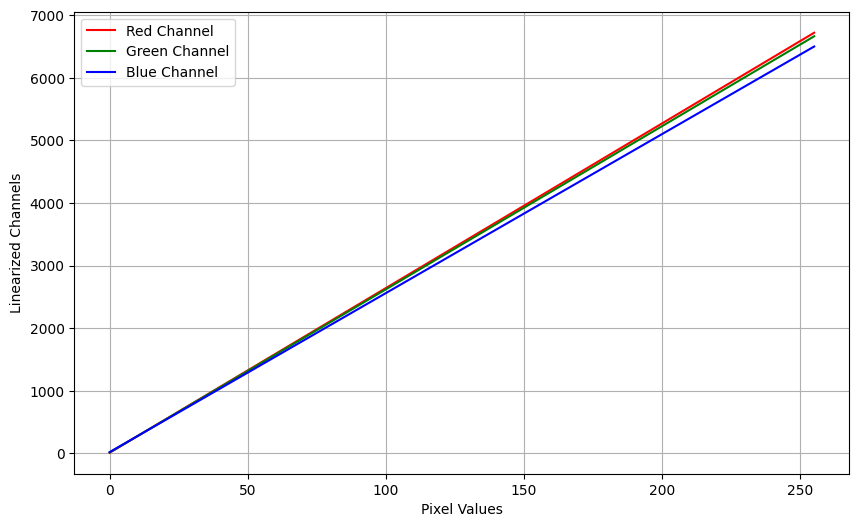

256 256 256


(array([   9.59282921,   35.90725938,   62.22168955,   88.53611972,
         114.85054989,  141.16498006,  167.47941023,  193.7938404 ,
         220.10827057,  246.42270073,  272.7371309 ,  299.05156107,
         325.36599124,  351.68042141,  377.99485158,  404.30928175,
         430.62371192,  456.93814209,  483.25257226,  509.56700243,
         535.8814326 ,  562.19586277,  588.51029294,  614.82472311,
         641.13915327,  667.45358344,  693.76801361,  720.08244378,
         746.39687395,  772.71130412,  799.02573429,  825.34016446,
         851.65459463,  877.9690248 ,  904.28345497,  930.59788514,
         956.91231531,  983.22674548, 1009.54117565, 1035.85560581,
        1062.17003598, 1088.48446615, 1114.79889632, 1141.11332649,
        1167.42775666, 1193.74218683, 1220.056617  , 1246.37104717,
        1272.68547734, 1298.99990751, 1325.31433768, 1351.62876785,
        1377.94319802, 1404.25762819, 1430.57205835, 1456.88648852,
        1483.20091869, 1509.51534886, 1535.82977

In [20]:
#converting to linear regime again

def linear_regime():
    pixel_values = np.linspace(0, 255, 256)
    coeffs = luminousity_curve(False)
    #print(type(coeffs))
    #print(*coeffs[0].shape)
    
    linear_red = []
    linear_green = []
    linear_blue = []

    linear_red = polynomial_func(pixel_values, *coeffs[0]) 

    linear_green = polynomial_func(pixel_values, *coeffs[1])

    linear_blue = polynomial_func(pixel_values, *coeffs[2])

    plt.figure(figsize=(10, 6))
    plt.plot(pixel_values, linear_red, 'r-', label='Red Channel')
    plt.plot(pixel_values, linear_green, 'g-', label='Green Channel')
    plt.plot(pixel_values, linear_blue, 'b-', label='Blue Channel')
    plt.xlabel('Pixel Values')
    plt.ylabel('Linearized Channels')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(len(linear_red), len(linear_green), len(linear_blue))
    return linear_red, linear_green, linear_blue #tuple of list

linear_regime()

In [21]:
images = []
for i in range(23,35):
    #data = "additional-exercise/A45A69" + str(i) + ".jpg" #converting to backslash \ for specific purpose 
    data = "additional-exercise\A45A69" + str(i) + ".jpg"
    images.append(data)
print(images)

['additional-exercise\\A45A6923.jpg', 'additional-exercise\\A45A6924.jpg', 'additional-exercise\\A45A6925.jpg', 'additional-exercise\\A45A6926.jpg', 'additional-exercise\\A45A6927.jpg', 'additional-exercise\\A45A6928.jpg', 'additional-exercise\\A45A6929.jpg', 'additional-exercise\\A45A6930.jpg', 'additional-exercise\\A45A6931.jpg', 'additional-exercise\\A45A6932.jpg', 'additional-exercise\\A45A6933.jpg', 'additional-exercise\\A45A6934.jpg']


In [22]:
#plotting the hdr image from normalised linear data of all three channels
def result():
    # Load data and exposure values
    data = images
    exposure = exposure_times_array()
    exposure = normalize_to_range(exposure, min_value=1, max_value=10)
    coeffs = luminousity_curve(False)
    
    # Apply inverse gamma correction
    
    #Convert each image to linear scale
    linear_data = []
    for i,img in enumerate(data):
        img = cv2.imread(img)
        #normalising the channels into the range of 0 to 255 to print
        img[:, :, 0] = normalize_to_range(polynomial_func(img[:, :, 0], *coeffs[0]), min_value=0, max_value=255)
        img[:, :, 1] = normalize_to_range(polynomial_func(img[:, :, 1], *coeffs[1]), min_value=0, max_value=255)
        img[:, :, 2] = normalize_to_range(polynomial_func(img[:, :, 2], *coeffs[2]), min_value=0, max_value=255)

        linear_data.append(img)
    #print(len(linear_data))

    # Produce HDR image
    hdr_image = produce_HDR(linear_data, exposure, 0.7)
    
    #saving the hdr image
    cv2.imwrite('HDR_image_Vicky.jpg', hdr_image.astype(np.uint8)) #using 8 bit format
    
    # Display the HDR image
    #plt.imshow(hdr_image.astype(np.uint8))
    #plt.show() #please look at the saved image that is better than the represented here.
result()

<<<<<<<  Normalised Exposure Values  >>>>>>
[10.          5.15151515  3.21212121  2.1038961   1.54978355  1.27272727
  1.13419913  1.06493506  1.03030303  1.01298701  1.004329    1.        ]
Draw Plot is False
